<a href="https://colab.research.google.com/github/bigdog3626/EDA_Regression_Hacks/blob/main/EDA_Regression_HACKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style("darkgrid")


In [2]:
df = fetch_california_housing(as_frame=True).frame

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


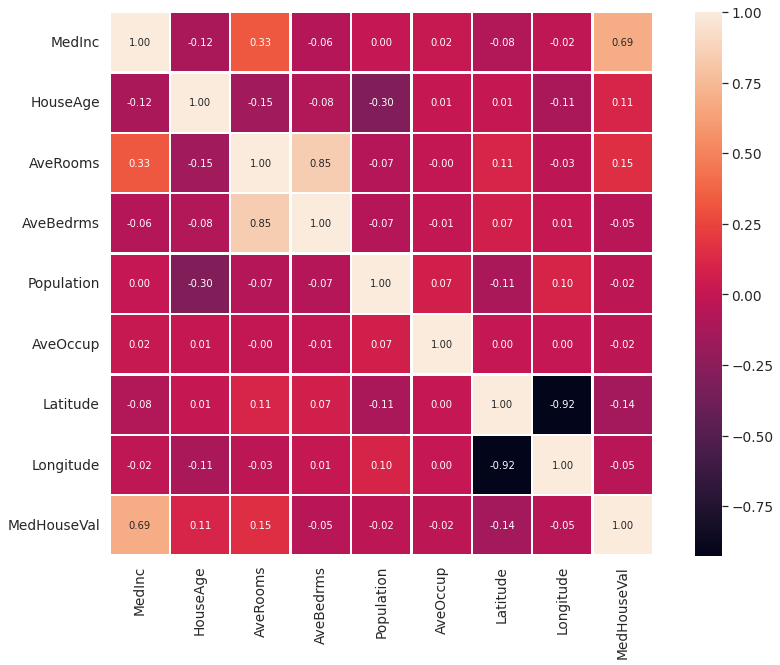

In [6]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.25)
sns.heatmap(df.corr(), linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=df.columns , xticklabels=df.columns
            )
plt.show()

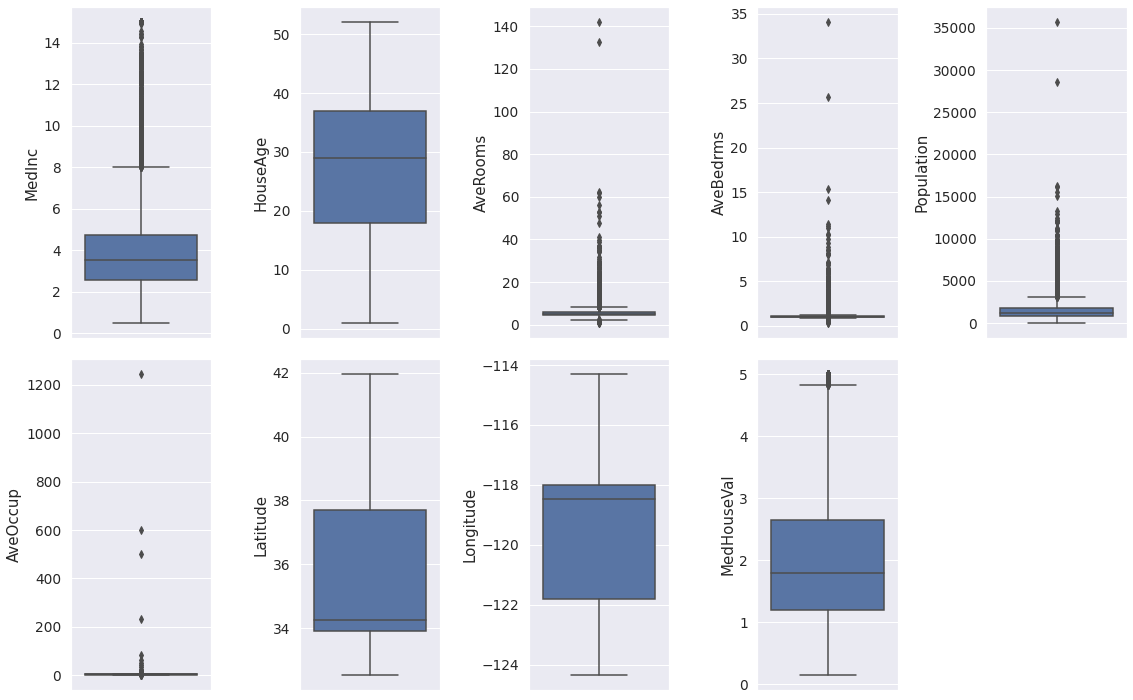

In [7]:
plt.figure(figsize=(16,10))
features = df.columns.tolist()
for i,col in enumerate(features):
    plt.subplot(2,5,i + 1)
    sns.boxplot(y=col, data=df, orient='h')
plt.tight_layout()
plt.show()

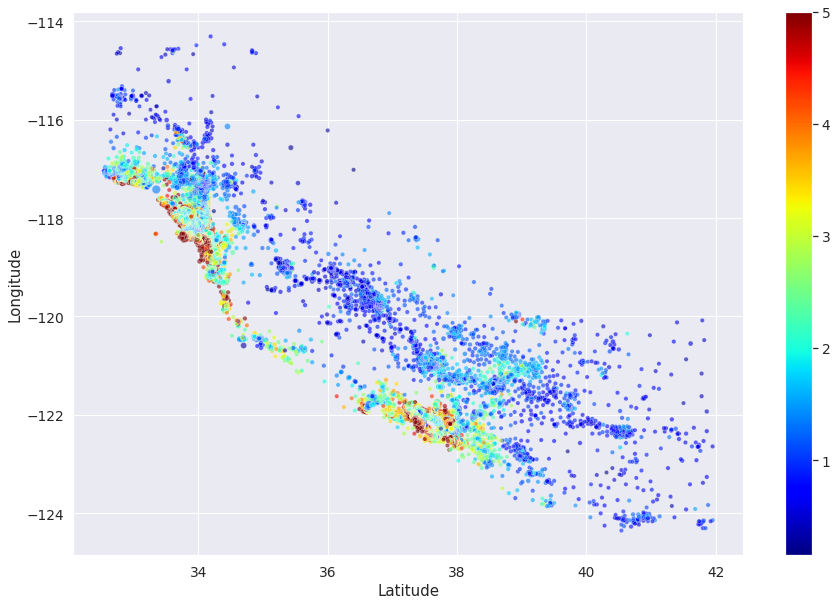

In [8]:
fig, ax = plt.subplots(figsize=(15,10))


sns.scatterplot(data=df, x='Latitude', y='Longitude', hue='MedHouseVal', size=df['Population']/100, alpha=.6, palette=plt.get_cmap("jet"))
norm = plt.Normalize(df['MedHouseVal'].min(), df['MedHouseVal'].max())
sm = plt.cm.ScalarMappable(cmap="jet", norm=norm)
sm.set_array([])
ax.get_legend().remove()
ax.figure.colorbar(sm)

In [9]:
df=df[df['AveRooms']<df['AveRooms'].quantile(0.99)]
df=df[df['AveBedrms']<df['AveBedrms'].quantile(0.99)]
df=df[df['Population']<df['Population'].quantile(0.99)]
df=df[df['AveOccup']<df['AveOccup'].quantile(0.99)]
df=df[df['MedInc']<df['MedInc'].quantile(0.99)]

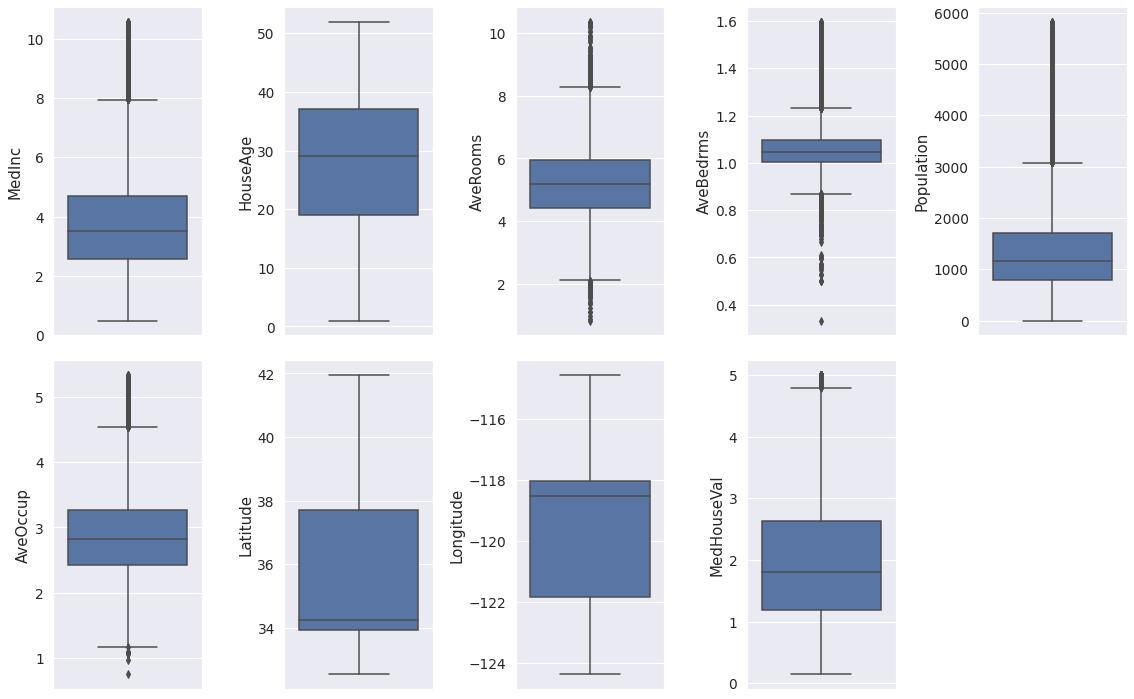

In [10]:
plt.figure(figsize=(16,10))
features = df.columns.tolist()
for i,col in enumerate(features):
    plt.subplot(2,5,i + 1)
    sns.boxplot(y=col, data=df, orient='h')
plt.tight_layout()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58cf93f340>,
      dtype=object)

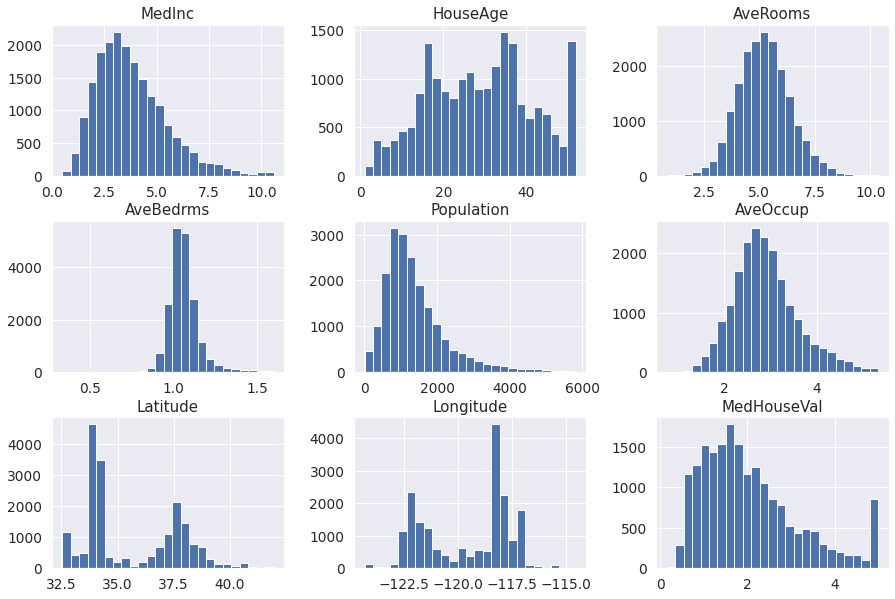

In [11]:
df.hist(bins=25, figsize=(15,10))

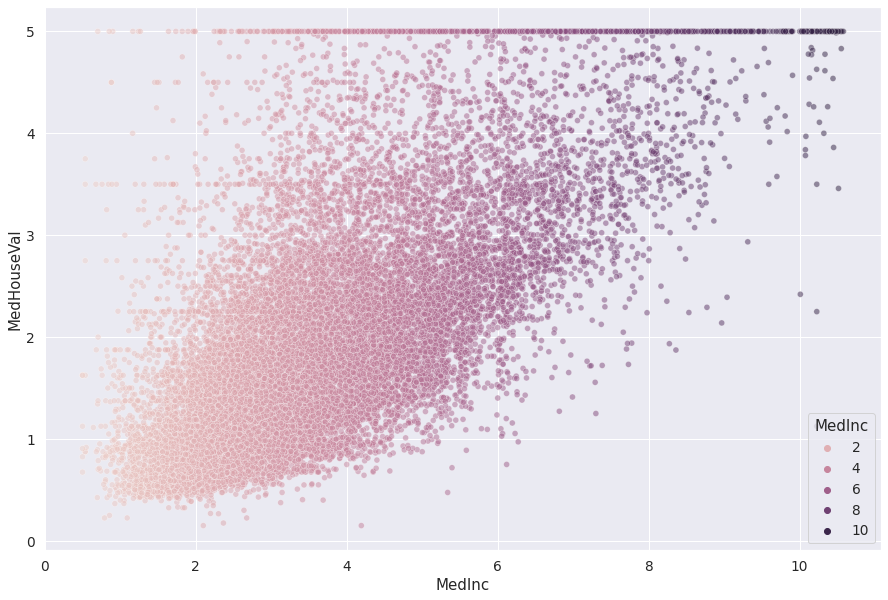

In [12]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(data=df, x='MedInc',y='MedHouseVal', hue='MedInc', alpha=0.5)

Begin Modeling

In [13]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn import set_config
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error
set_config(display='diagram')

In [16]:
lr = LinearRegression()



rmse = np.sqrt(-np.mean(cross_val_score(lr, X,y,cv=5, n_jobs=-1, scoring = 'neg_mean_squared_error')))
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('RMSE: ', rmse)
print('R^2 Score: ', r2)

RMSE:  0.6751337526255002
R^2 Score:  0.6582613643751134


In [17]:
FEATURES = list(X.columns)
preprocessor = ColumnTransformer([('Scaler', MinMaxScaler(), FEATURES)])


def create_pipeline(model):
  return Pipeline(steps=[('preprocessing', preprocessor), ('model', model)])


In [18]:
from sklearn.model_selection import GridSearchCV
score_calc = 'neg_mean_squared_error'

In [19]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print('Score: ',best_score)    
    print(grid.best_params_)
    return best_score, grid.best_estimator_

In [20]:
lin_reg_pipe = create_pipeline(LinearRegression())
parameters = {'model__fit_intercept':[True,False], 'model__normalize':[True,False], 'model__copy_X':[True, False]}
grid_linear_sc = GridSearchCV(lin_reg_pipe, parameters, cv=5, verbose=1 , scoring = score_calc, n_jobs=-1)
grid_linear_sc.fit(X, y)

sc_linear_sc, lin_reg_pipe = get_best_score(grid_linear_sc)

lin_reg_pipe

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Score:  0.6751337526255012
{'model__copy_X': True, 'model__fit_intercept': True, 'model__normalize': True}


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('Scaler', MinMaxScaler(),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup',
                                                   'Latitude',
                                                   'Longitude'])])),
                ('model', LinearRegression(normalize=True))])

In [21]:
ridge_pipe = create_pipeline(Ridge())
parameters = {'model__alpha':[0.001,0.005,0.01,0.1,0.5,1], 'model__normalize':[True,False], 'model__tol':[1e-06,5e-06,1e-05,5e-05]}
grid_ridge_sc = GridSearchCV(ridge_pipe, parameters, cv=5, verbose=1 , scoring = score_calc, n_jobs=-1)
grid_ridge_sc.fit(X, y)

sc_ridge_sc,  ridge_pipe = get_best_score(grid_ridge_sc)
ridge_pipe

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Score:  0.6751339449352842
{'model__alpha': 0.001, 'model__normalize': False, 'model__tol': 1e-06}


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('Scaler', MinMaxScaler(),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup',
                                                   'Latitude',
                                                   'Longitude'])])),
                ('model', Ridge(alpha=0.001, normalize=False, tol=1e-06))])

In [22]:
lasso_pipe = create_pipeline(Lasso())
parameters = {'model__alpha':[1e-03,0.01,0.1,0.5,0.8,1], 'model__normalize':[True,False], 'model__tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}
grid_lasso = GridSearchCV(lasso_pipe, parameters, cv=5, verbose=1, scoring = score_calc, n_jobs=-1)
grid_lasso.fit(X, y)
sc_lasso, lasso_pipe = get_best_score(grid_lasso)
lasso_pipe

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Score:  0.6781049087581582
{'model__alpha': 0.001, 'model__normalize': False, 'model__tol': 1e-06}


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('Scaler', MinMaxScaler(),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup',
                                                   'Latitude',
                                                   'Longitude'])])),
                ('model', Lasso(alpha=0.001, normalize=False, tol=1e-06))])

In [23]:

sgd_pipe = create_pipeline(SGDRegressor())
parameters = {'model__max_iter' :[10000], 'model__alpha':[1e-05], 'model__epsilon':[1e-02], 'model__fit_intercept' : [True]  }
grid_sgd = GridSearchCV(sgd_pipe, parameters, cv=5, verbose=1, scoring = score_calc, n_jobs=-1)
grid_sgd.fit(X, y)
sc_sgd, sgd_pipe = get_best_score(grid_sgd)
sgd_pipe

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Score:  0.7130549272958173
{'model__alpha': 1e-05, 'model__epsilon': 0.01, 'model__fit_intercept': True, 'model__max_iter': 10000}


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('Scaler', MinMaxScaler(),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup',
                                                   'Latitude',
                                                   'Longitude'])])),
                ('model',
                 SGDRegressor(alpha=1e-05, epsilon=0.01, max_iter=10000))])

In [24]:
from sklearn.tree import DecisionTreeRegressor


dtree_pipe  = create_pipeline(DecisionTreeRegressor())

param_grid = { 'model__max_depth' : [7,8,9,10] , 'model__max_features' : [4,5,6,7,8] ,
               'model__max_leaf_nodes' : [None, 12,15,18,20] ,'model__min_samples_split' : [20,25,30],
               'model__random_state': [5] }
            
grid_dtree = GridSearchCV(dtree_pipe, param_grid, cv=5, refit=True, verbose=1, scoring = score_calc, n_jobs=-1)
grid_dtree.fit(X, y)

sc_dtree, dtree_pipe = get_best_score(grid_dtree)
dtree_pipe

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Score:  0.7700606975169433
{'model__max_depth': 7, 'model__max_features': 7, 'model__max_leaf_nodes': None, 'model__min_samples_split': 30, 'model__random_state': 5}


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('Scaler', MinMaxScaler(),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup',
                                                   'Latitude',
                                                   'Longitude'])])),
                ('model',
                 DecisionTreeRegressor(max_depth=7, max_features=7,
                                       min_samples_split=30, random_state=5))])

In [25]:


from sklearn.neighbors import KNeighborsRegressor

knn_pipe = create_pipeline(KNeighborsRegressor(n_jobs=-1))

param_grid = {'model__n_neighbors' : [3,4,5,6,7,10,15] ,    
              'model__weights' : ['uniform','distance'] , 'model__algorithm' : ['ball_tree', 'kd_tree', 'brute']}

grid_knn = GridSearchCV(knn_pipe, param_grid, cv=5, refit=True, verbose=1, scoring = score_calc, n_jobs=-1)
grid_knn.fit(X, y)

sc_knn, knn_pipe = get_best_score(grid_knn)
knn_pipe

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Score:  0.6891633169853112
{'model__algorithm': 'ball_tree', 'model__n_neighbors': 15, 'model__weights': 'distance'}


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('Scaler', MinMaxScaler(),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup',
                                                   'Latitude',
                                                   'Longitude'])])),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_jobs=-1,
                                     n_neighbors=15, weights='distance'))])

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
gb_pipe = create_pipeline(GradientBoostingRegressor(random_state=0, max_depth=4))
param_grid = {'model__max_depth': [5,6,7]}
grid_gb = GridSearchCV(gb_pipe, param_grid, cv=5, verbose=1, scoring=score_calc, n_jobs=-1)
grid_gb.fit(X,y)
sc_gb, gb_pipe = get_best_score(grid_gb)
gb_pipe

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Score:  0.6308583542018923
{'model__max_depth': 6}


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('Scaler', MinMaxScaler(),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup',
                                                   'Latitude',
                                                   'Longitude'])])),
                ('model',
                 GradientBoostingRegressor(max_depth=6, random_state=0))])

In [27]:
xgb_reg = xgb.XGBRegressor(n_jobs=-1)
sc = MinMaxScaler()
X_sc = sc.fit_transform(X)
parameters = {'model__n_estimators': [1000,200,300], 'model__learning_rate': [0.0001, 0.001,0.005,0.01], 'model__max_depth': [8]}
grid_xgb_sc = GridSearchCV(xgb_reg, parameters, cv=5, verbose=1, scoring=score_calc, n_jobs=-1)
grid_xgb_sc.fit(X_sc,y)
sc_xgb_sc, xgb_pipe = get_best_score(grid_xgb_sc)
xgb_pipe = create_pipeline(xgb_pipe)
xgb_pipe

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[00:21:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Score:  0.6456676363585283
{'model__learning_rate': 0.0001, 'model__max_depth': 8, 'model__n_estimators': 1000}


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('Scaler', MinMaxScaler(),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup',
                                                   'Latitude',
                                                   'Longitude'])])),
                ('model',
                 XGBRegressor(model__learning_rate=0.0001, model__max_depth=8,
                              model__n_estimators=1000, n_jobs=-1))])

In [28]:
models= [lin_reg_pipe, ridge_pipe, lasso_pipe, sgd_pipe, dtree_pipe, knn_pipe, gb_pipe, xgb_pipe]

In [29]:
from sklearn.model_selection import cross_val_score



rmse_scores = [np.sqrt(-np.mean(cross_val_score(est, X,y, cv=5, n_jobs=-1, scoring=score_calc))) for est in models]

In [30]:
list_regressors = [model[-1].__class__.__name__ for model in models]

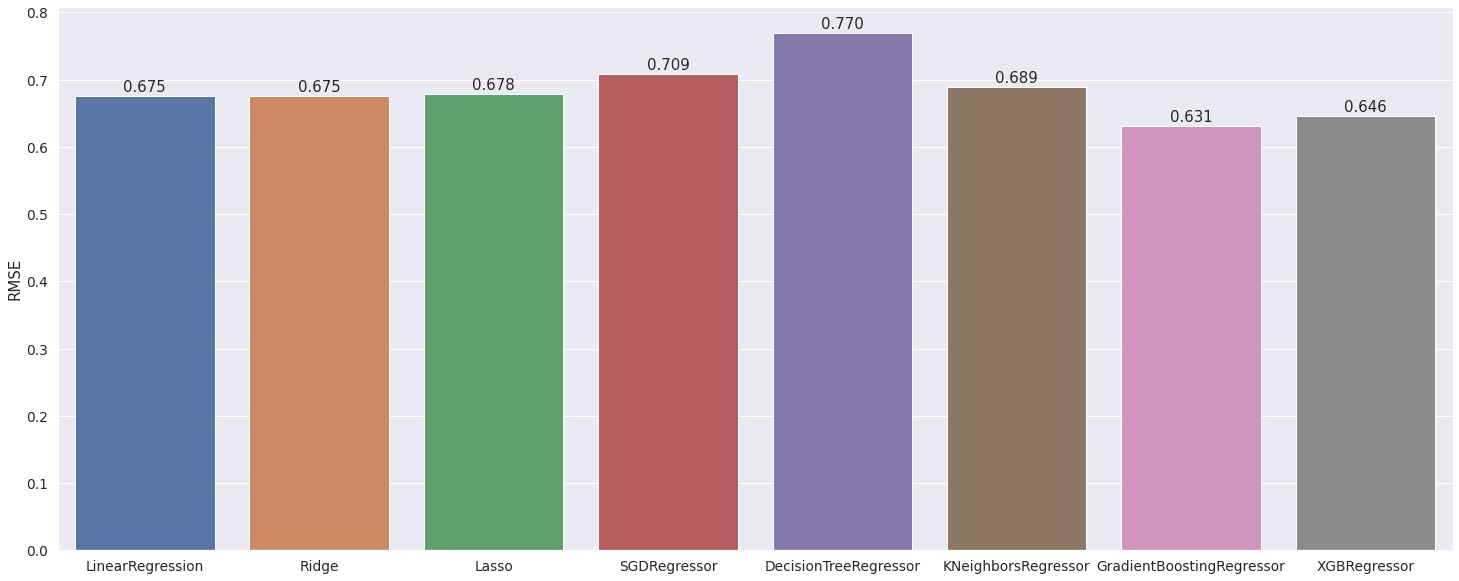

In [31]:
fig, ax = plt.subplots(figsize=(25,10))
splot = sns.barplot(x=list_regressors, y=rmse_scores, errwidth=0)
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.ylabel('RMSE')
plt.show()



In [32]:
from sklearn.metrics import r2_score

def get_r2_score(model):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  score = r2_score(y_test, y_pred)
  return score
def collect_pred(model):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  return y_pred


In [33]:
predictions = {}
scores = []
for model in models:
  scores.append(get_r2_score(model))
  predictions[model[-1].__class__.__name__] = collect_pred(model)
df_predictions = pd.DataFrame(data=predictions) 
df_predictions.corr()

[00:22:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:22:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,LinearRegression,Ridge,Lasso,SGDRegressor,DecisionTreeRegressor,KNeighborsRegressor,GradientBoostingRegressor,XGBRegressor
LinearRegression,1.000000,1.000000,0.999506,0.978110,0.871946,0.908012,0.901946,0.933440
Ridge,1.000000,1.000000,0.999506,0.978111,0.871946,0.908012,0.901946,0.933440
Lasso,0.999506,0.999506,1.000000,0.982777,0.874436,0.909583,0.901782,0.933865
SGDRegressor,0.978110,0.978111,0.982777,1.000000,0.873407,0.902664,0.883966,0.918473
DecisionTreeRegressor,0.871946,0.871946,0.874436,0.873407,1.000000,0.901460,0.917451,0.927186
KNeighborsRegressor,0.908012,0.908012,0.909583,0.902664,0.901460,1.000000,0.943446,0.946536
GradientBoostingRegressor,0.901946,0.901946,0.901782,0.883966,0.917451,0.943446,1.000000,0.975893
XGBRegressor,0.933440,0.933440,0.933865,0.918473,0.927186,0.946536,0.975893,1.000000


In [34]:
df_scores = pd.DataFrame({'model': [model[-1].__class__.__name__ for model in models], 'scores': scores})
df_scores.sort_values(['scores'], ascending=False)

,model,scores
6,GradientBoostingRegressor,0.816684
7,XGBRegressor,0.773535
5,KNeighborsRegressor,0.735114
2,Lasso,0.658326
1,Ridge,0.658262
0,LinearRegression,0.658261
4,DecisionTreeRegressor,0.653330
3,SGDRegressor,0.632125


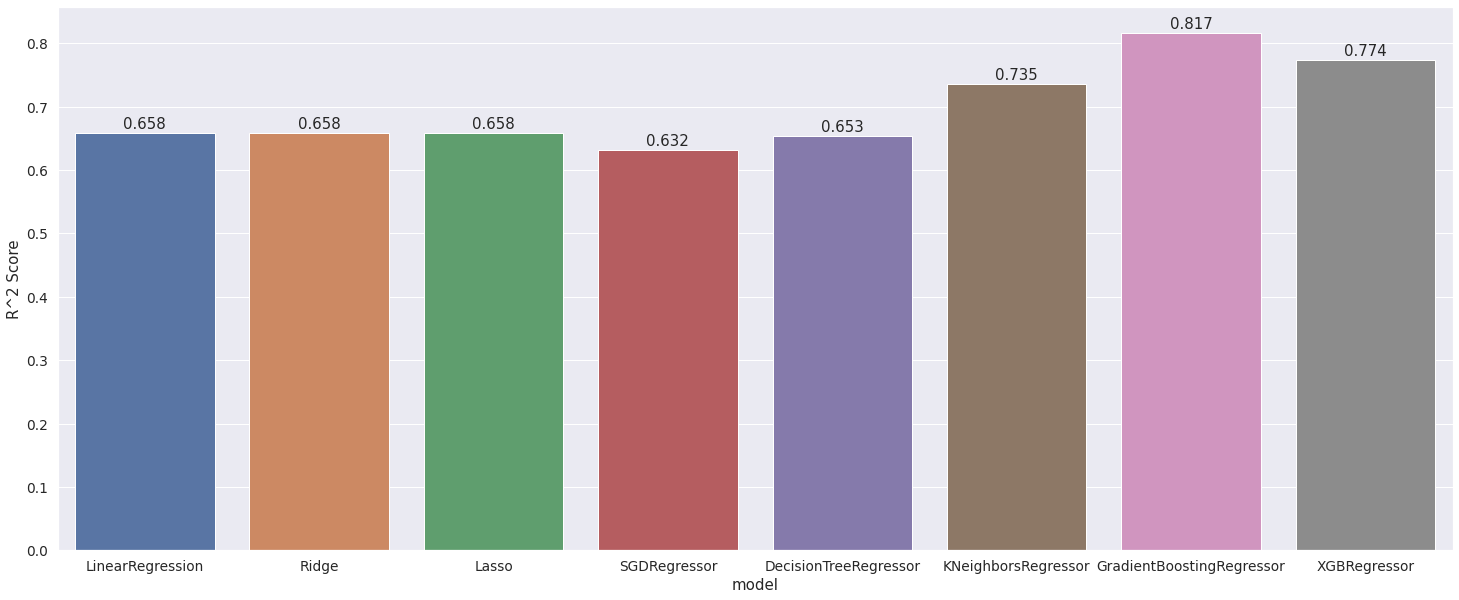

In [35]:
fig, ax = plt.subplots(figsize=(25,10))
splot = sns.barplot(data= df_scores, x='model', y='scores', errwidth=0)
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.ylabel('R^2 Score')
plt.show()

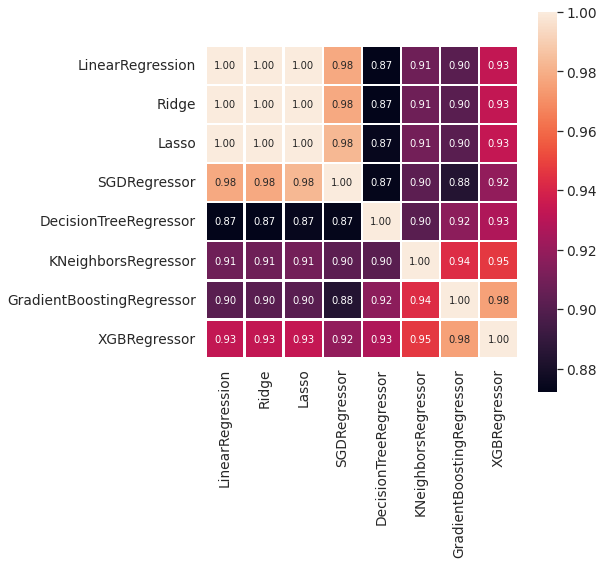

In [36]:


plt.figure(figsize=(7, 7))
sns.set(font_scale=1.25)
sns.heatmap(df_predictions.corr(), linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=df_predictions.columns , xticklabels=df_predictions.columns
            )
plt.show()

